In [1]:
from astropy.table import Table
import numpy as np
from jetset.data_loader import ObsData
from jetset.data_loader import Data
from jetset.jet_model import Jet
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
from jetset.sed_shaper import SEDShape

In [2]:
t = Table.read("astropy_sed.ecsv")
data_table=Data(data_table=t)
sed_data=ObsData(data_table=data_table)

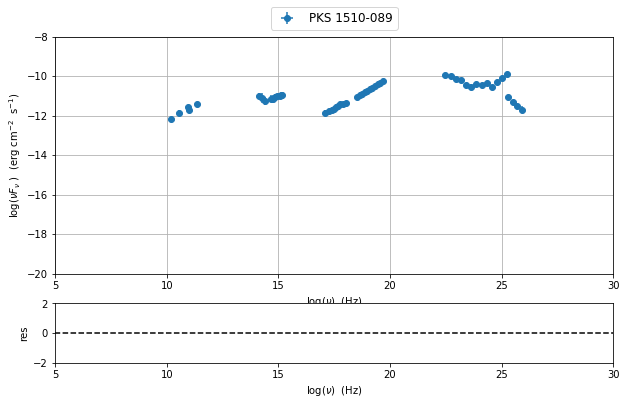

In [3]:
myPlot=sed_data.plot_sed()

In [4]:
jet = Jet(name='PKS1510-089', electron_distribution='bkn')
jet.add_EC_component("EC_DT")
jet.add_EC_component("EC_BLR")

In [5]:
jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 L_Disk           | Disk                 | erg/s            | +1.000000e+45 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 R_BLR_in         | BLR                  | cm               | +1.000000e+18 | [+0.000000e+00,No           ] | False 
 R_BLR_out        | BLR                  | cm       

In [6]:
jet.set_par("gmin", 2.5)
jet.set_par("gmax", 3e5)
jet.set_par("gamma_break", 130)
jet.set_par("p", 1.9)
jet.set_par("p_1", 3.5)
jet.set_par("B", 0.35)
jet.set_par("N", 1e2)
jet.set_par("beam_obj", 25)
jet.set_par("R", np.log10(2e16))
jet.set_par("R_H", 7e17)
jet.set_par("L_Disk", 6.7 * 1e45)
jet.set_par("R_BLR_in", 2.6 * 1e17)
jet.set_par("R_BLR_out", 5 * 1e17)
jet.set_par("R_DT", 2.6 * 1e18)
jet.set_par("T_DT", 1e3)
jet.set_par("tau_BLR", 0.1)
jet.set_par("tau_DT", 0.6)
#jet.spectral_components.Sync.state="on"
jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +3.500000e-01 | [+0.000000e+00,No           ] | False 
 L_Disk           | Disk                 | erg/s            | +6.700000e+45 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.630103e+01 | [+0.000000e+00,+3.000000e+01] | True 
 R_BLR_in         | BLR                  | cm               | +2.600000e+17 | [+0.000000e+00,No           ] | False 
 R_BLR_out        | BLR                  | cm       

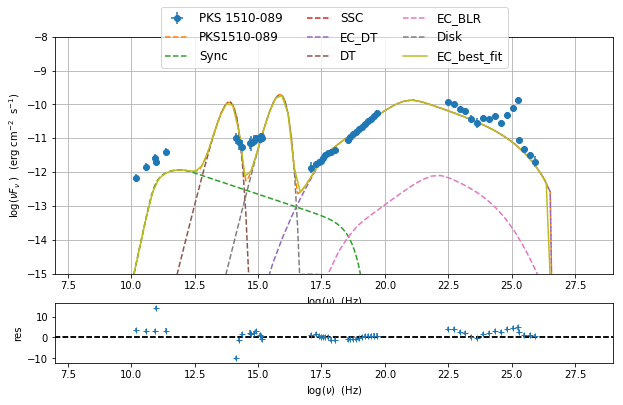

In [7]:
jet.set_gamma_grid_size(200)
fit_model = FitModel(jet=jet, name='EC_best_fit', template=None)
fit_model.eval()
pl=fit_model.plot_model(sed_data=sed_data)
pl.rescale(y_min=-15,y_max=-8, x_min=7,x_max=29)

In [8]:
fit_model.parameters.gmax.fit_range=[1e5,1e8]
fit_model.parameters.gmin.fit_range=[1,1e3]
fit_model.parameters.gamma_break.fit_range=[1e2,1e5]
fit_model.parameters.p.fit_range=[1,2.5]
fit_model.parameters.p_1.fit_range=[1.5,3.5]
fit_model.parameters.N.fit_range=[1, 1e4]
fit_model.freeze("R")
fit_model.freeze("beam_obj")
fit_model.freeze("z_cosm")
fit_model.parameters.R_H.fit_range=[1e16, 1e18]
fit_model.freeze("L_Disk")
fit_model.freeze("R_BLR_in")
fit_model.freeze("R_BLR_out")
fit_model.freeze("R_DT")
fit_model.freeze("T_DT")
fit_model.freeze("tau_BLR")
fit_model.freeze("tau_DT")
fit_model.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +3.500000e-01 | [+0.000000e+00,No           ] | False 
 L_Disk           | Disk                 | erg/s            | +6.700000e+45 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.630103e+01 | [+0.000000e+00,+3.000000e+01] | True 
 R_BLR_in         | BLR                  | cm               | +2.600000e+17 | [+0.000000e+00,No           ] | False 
 R_BLR_out        | BLR                  | cm       

In [9]:
#lsb minimizer
model_minimizer,best_fit=fit_SED(fit_model,sed_data,10.0**10,10**29.0,fitname='EC_best_fit',minimizer='lsb')

filtering data in fit range = [1.000000e+10,1.000000e+29]
data length 52

*** start fit process ***
initial pars: 
-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +3.500000e-01 | [+0.000000e+00,No           ] | False 
 L_Disk           | Disk                 | erg/s            | +6.700000e+45 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.630103e+01 | [+0.000000e+00,+3.000000e+01] | True 
 R_BLR_in         | BLR                  | cm         

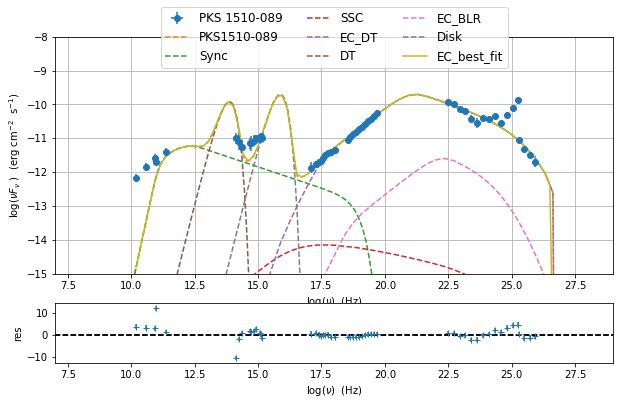

In [10]:
p2=fit_model.plot_model(sed_data=sed_data)
p2.rescale(y_min=-15,x_min=7,x_max=29)

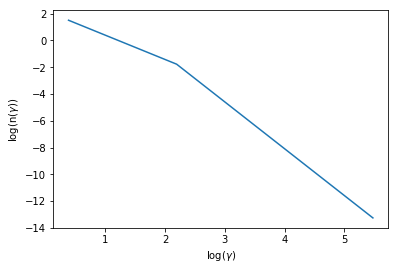

In [11]:
jet.electron_distribution.plot()